In [1]:
import pandas as pd
df = pd.read_csv('q2_2018_data.csv', parse_dates=['Updated'], index_col='Updated')

In [3]:
df.head()

,CBSA Office,Location,Commercial Flow,Traveller Flow
Updated,,,,
2017-04-01 01:00:00,St. Stephen,"St.Stephen, NB",Not applicable,No delay
2017-04-01 02:00:00,St. Stephen,"St.Stephen, NB",Not applicable,No delay
2017-04-01 03:00:00,St. Stephen,"St.Stephen, NB",Not applicable,No delay
2017-04-01 04:00:00,St. Stephen,"St.Stephen, NB",Not applicable,No delay
2017-04-01 05:00:00,St. Stephen,"St.Stephen, NB",Not applicable,No delay


In [4]:
# remove unnecessary columns
df.drop(columns='Commercial Flow', inplace=True)


In [5]:
# replace 'No delay" with 0
df.replace(to_replace='No delay', value=0, inplace=True)

In [6]:
#rename column of interest
df.rename(columns={'Traveller Flow': 'wait'}, inplace=True)
df.head()

,CBSA Office,Location,wait
Updated,,,
2017-04-01 01:00:00,St. Stephen,"St.Stephen, NB",0
2017-04-01 02:00:00,St. Stephen,"St.Stephen, NB",0
2017-04-01 03:00:00,St. Stephen,"St.Stephen, NB",0
2017-04-01 04:00:00,St. Stephen,"St.Stephen, NB",0
2017-04-01 05:00:00,St. Stephen,"St.Stephen, NB",0


In [29]:
df.Location.unique()

array(['St.Stephen, NB', 'Belleville, NB', 'Edmundston, NB',
       'Stanstead, QC', 'St. Armand, QC', 'Lacolle, QC', 'Cornwall, ON',
       'Fort Erie, ON', 'Niagara Falls, ON', 'Queenston, ON',
       'Prescott, ON', 'Sarnia, ON', 'Sault Ste. Marie, ON', 'Windsor, ON',
       'Gananoque, ON', 'Fort Frances, ON', 'Emerson, MB',
       'North Portal, SK', 'Coutts, AB', 'Surrey, BC', 'Delta, BC',
       'Huntingdon, BC', 'Aldergrove, BC'], dtype=object)

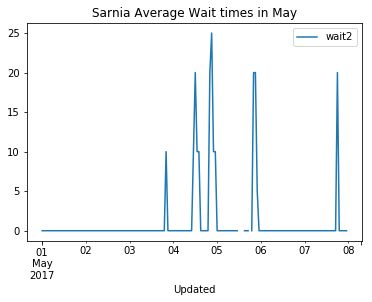

In [58]:
sarnia = df.loc[df.Location == 'Sarnia, ON']
sarnia = sarnia['5-1-17':'5-7-17']
sarnia_df = pd.DataFrame(sarnia.wait2.resample('H').mean())
sarnia_df.plot(title='Sarnia Average Wait times in May')

In [8]:
# conver wait values to floats if possible as 'wait2' and drop non-integer values
df['wait2'] = pd.to_numeric(df.wait, errors='coerce')
df2 = df.dropna(axis=0)

In [10]:
#drop 'wait'
df = df2.drop('wait', axis=1)

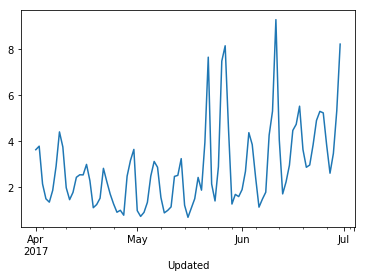

In [17]:
%matplotlib inline
df.wait2.resample('D').mean().plot()

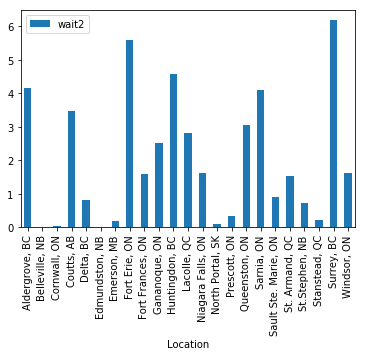

In [25]:
g = df.groupby('Location').mean()
g.plot(kind='bar')